time series ends   2011-12-30


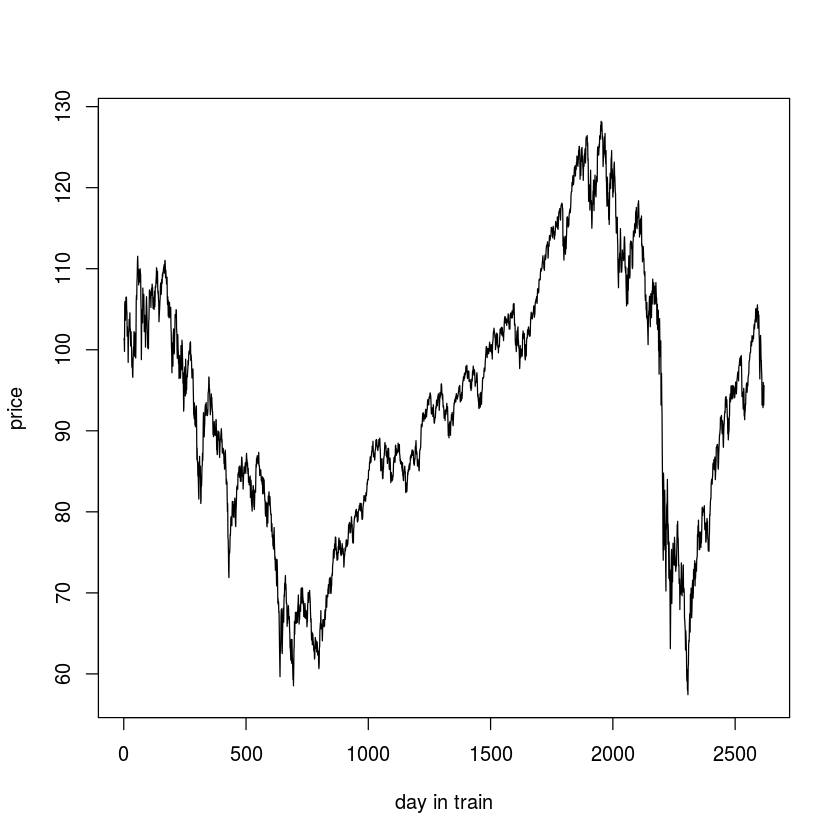

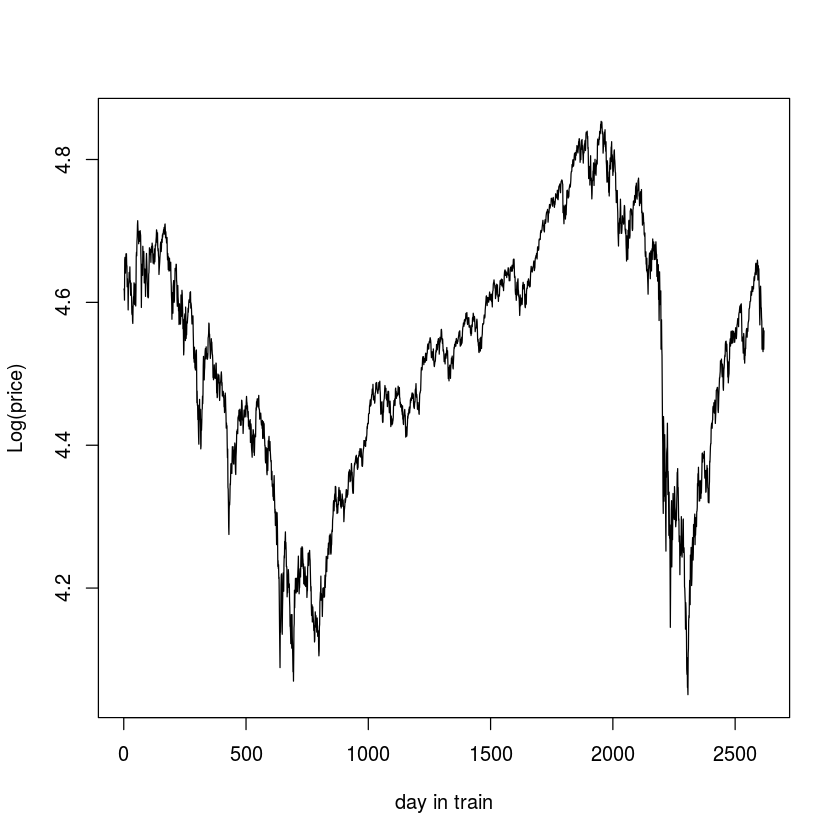

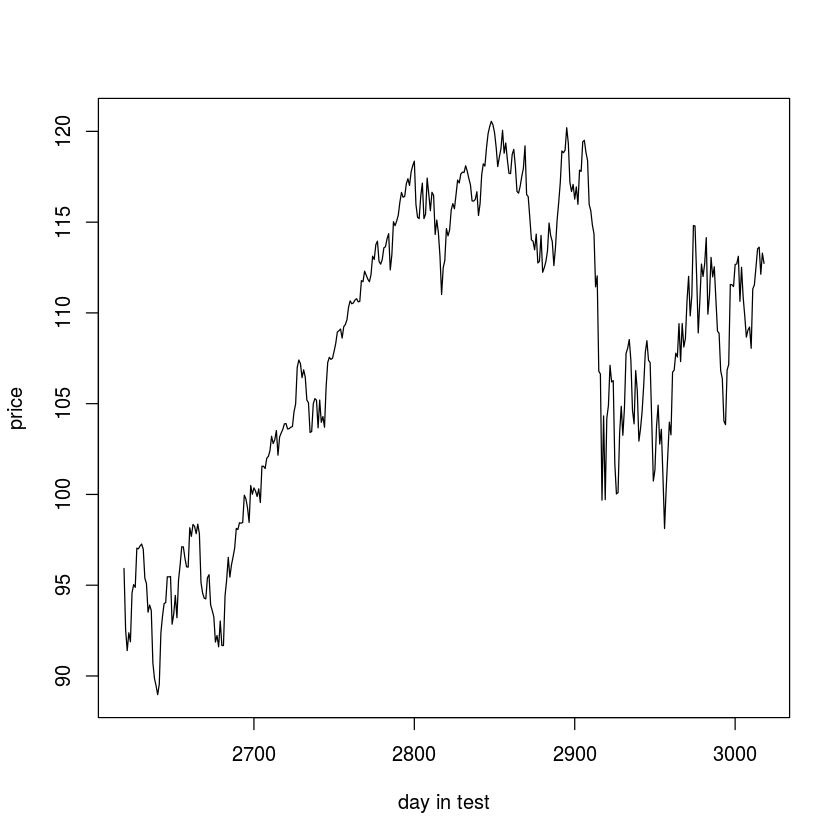

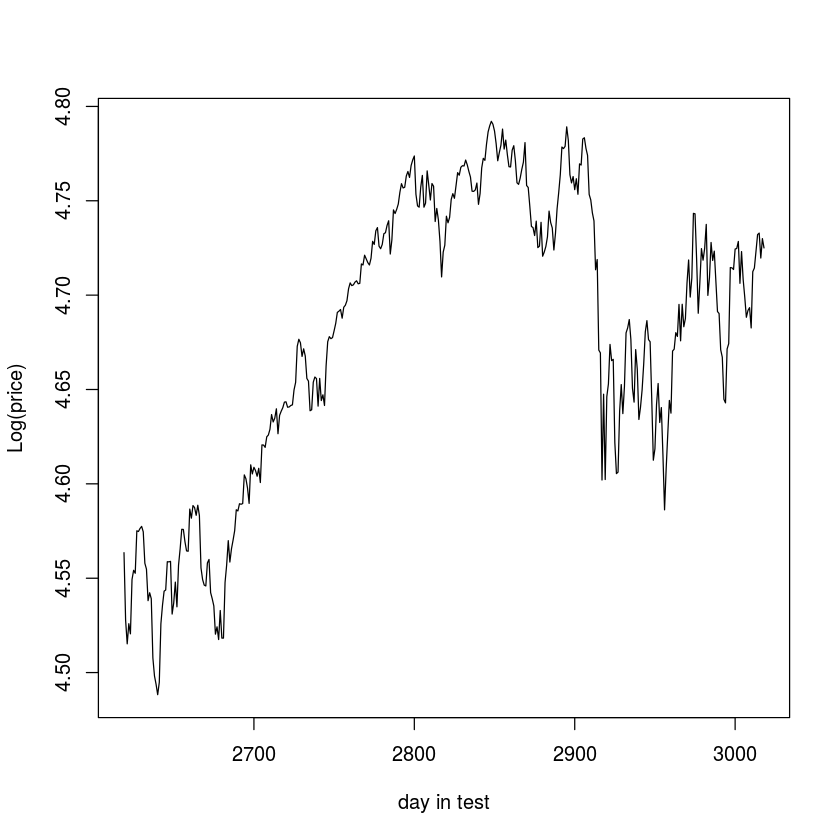

In [216]:
#install.packages('tseries')
#install.packages('CombMSC')
library(CombMSC)
library(tseries)
library(zoo)


spy = get.hist.quote(instrument = "SPY", "2000-01-04", "2011-12-31",quote = c("AdjClose"),
provider = c("yahoo"), method = NULL, compression = "d",
retclass = c("zoo"), quiet = FALSE, drop = FALSE)

#spy$train_test = get.hist.quote(instrument = "spy$train", "2011-01-01", "2011-12-31",quote = c("AdjClose"),
#provider = c("yahoo"), method = NULL, compression = "d",
#retclass = c("zoo"), quiet = FALSE, drop = FALSE)


#spy$train =ts(spy$train, frequency=7)

test_len = 400

spy = ts(coredata(spy), frequency = 1)
spy = splitTrainTest(spy, numTrain = length(spy) - test_len)
#spy$train
#spy$test

plot(spy$train,ylab='price', xlab='day in train')
plot(log(spy$train), ylab="Log(price)", xlab="day in train")

plot.ts(spy$test,ylab='price', xlab='day in test')
plot.ts(log(spy$test), ylab="Log(price)", xlab="day in test")


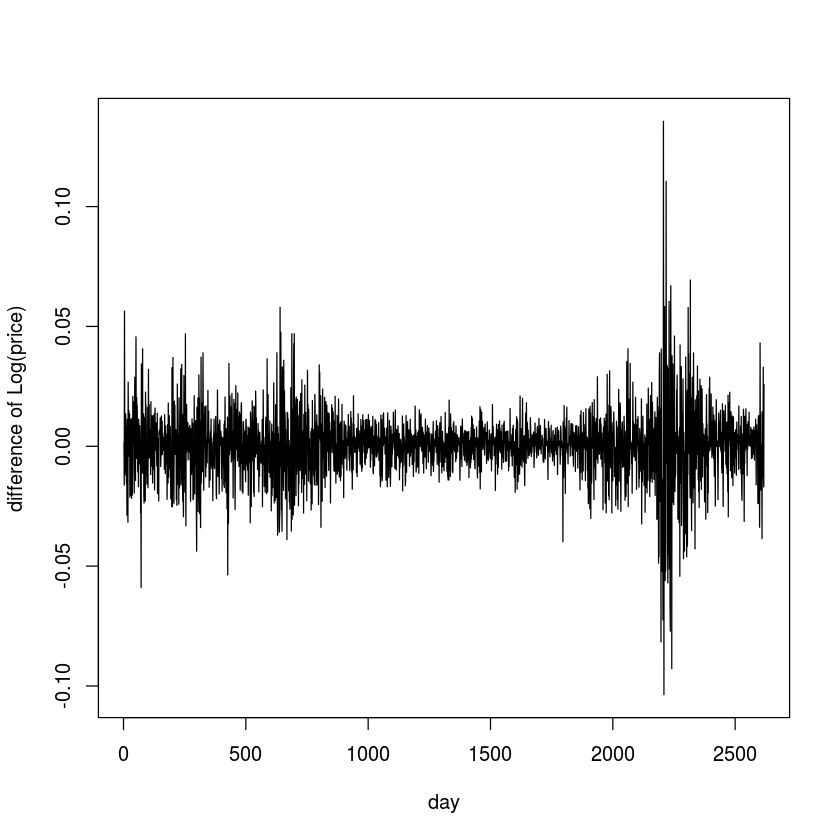

In [204]:
spy$train_diff = diff(log(spy$train))
spy$train_log = log(spy$train)
spy$test_log = log(spy$test)

plot.ts(spy$train_diff,ylab="difference of Log(price)", xlab="day")



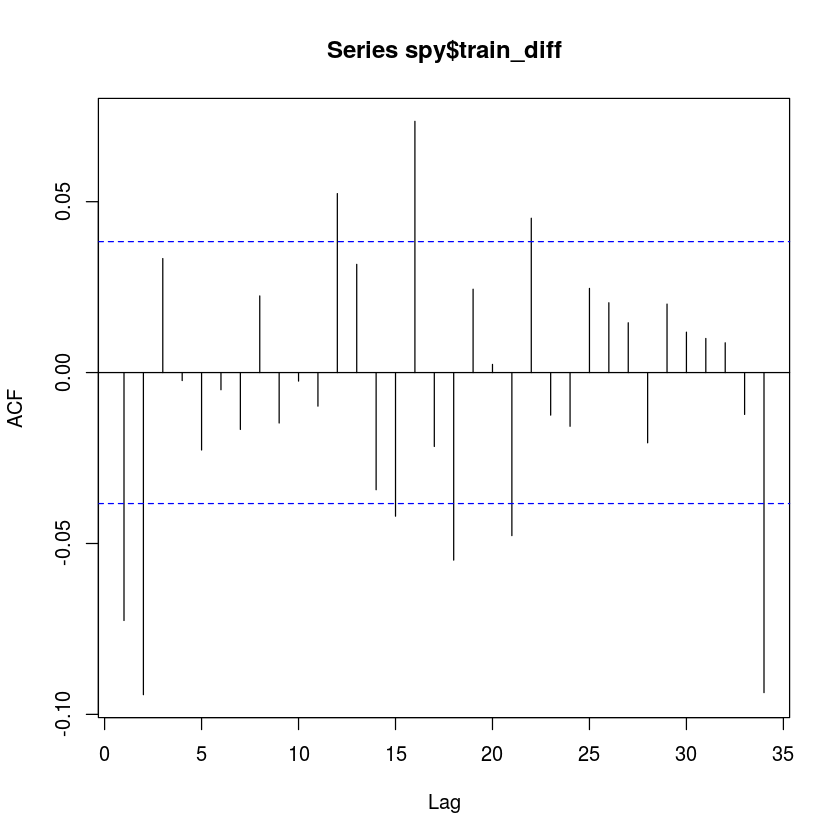

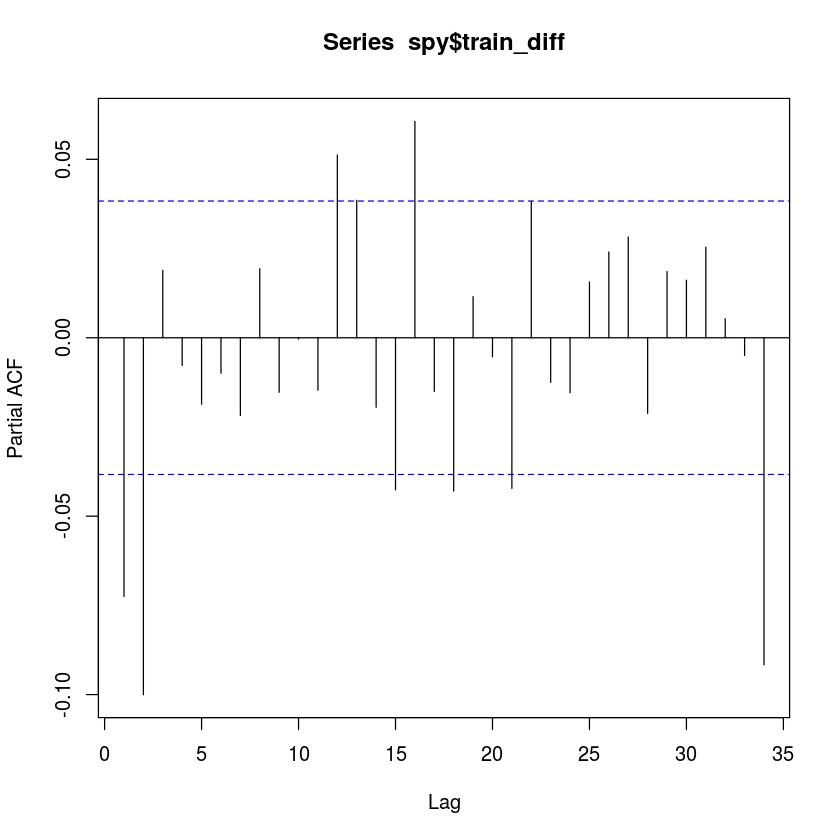

In [205]:
#adf.test(spy$train_diff)
acf(spy$train_diff, na.action= na.pass)
pacf(spy$train_diff, na.action= na.pass)

In [206]:
library(TSA)



eacf(spy$train_diff)

#spy$train_diff

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x o o o o o o o o o  x  o  o 
1 x x o o o o o o o o o  x  x  o 
2 x o o x o o o o o o o  o  o  o 
3 x o x o o o o o o o o  o  o  o 
4 x x x o x o o o o o o  o  o  o 
5 x x x x x o o o o o o  o  o  o 
6 x x x x x x o o o o o  o  o  o 
7 x o x x x x x o o o o  o  o  o 


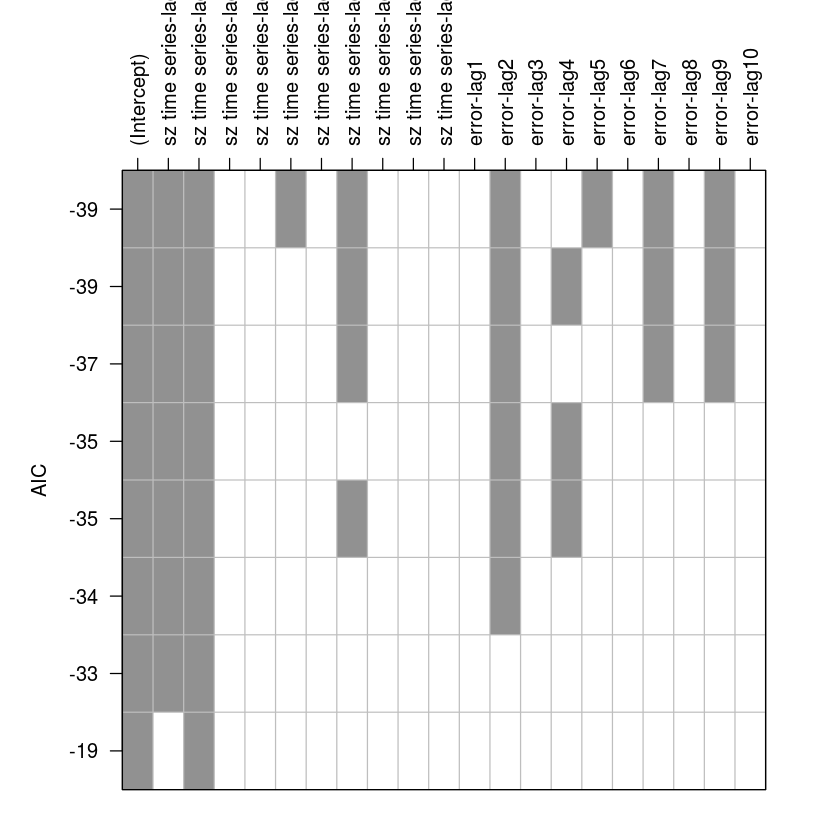

In [207]:
subsets = armasubsets(spy$train_diff, nar=10, nma=10, y.name = "sz time series", ar.method='ols' )
plot(subsets,scale = "AIC")

Series: spy$train_log 
ARIMA(2,1,1)                    

Coefficients:
          ar1      ar2     ma1
      -0.2752  -0.1142  0.1974
s.e.   0.1730   0.0213  0.1739

sigma^2 estimated as 0.000194:  log likelihood=7472.88
AIC=-14937.76   AICc=-14937.75   BIC=-14914.28

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-2.485531e-05,0.01391722,0.009426511,-0.001108696,0.2111146,0.9996686,-3.156144e-05,NA
Test set,1.195935e-01,0.14783872,0.126188688,2.523050120,2.6689824,13.3821372,9.889959e-01,13.24047


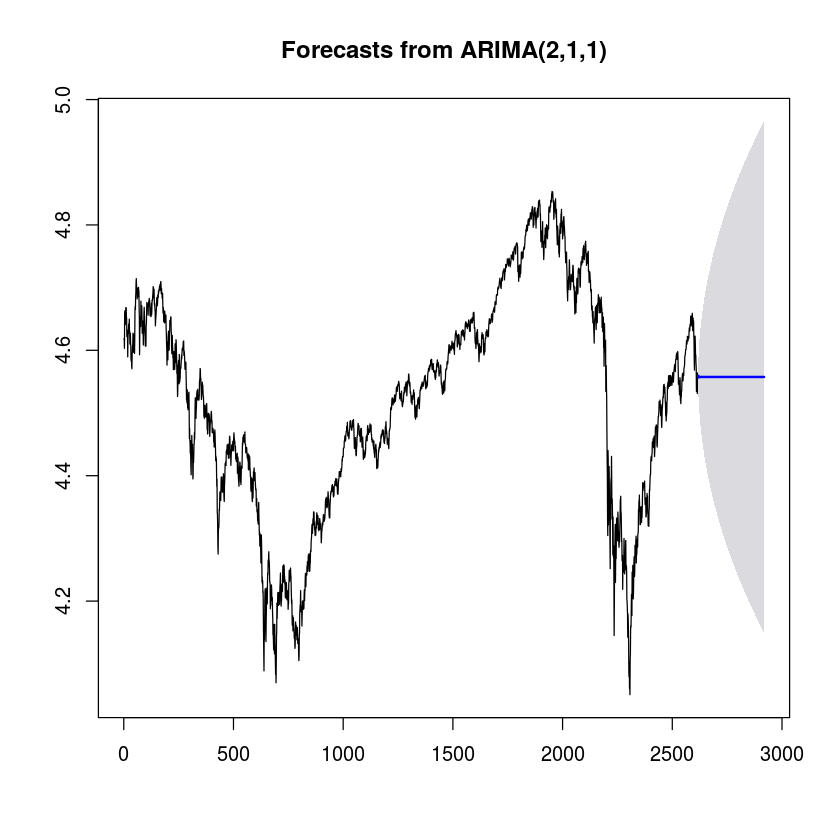

In [208]:
library(forecast)
fit1 = Arima(spy$train_log, order=c(2,1,1))
fit1


fit1_forecast = forecast(fit1, h=300,level=c(0.95))
accuracy(fit1_forecast, spy$test_log)
plot(fit1_forecast)

Series: spy$train_log 
ARIMA(7,1,7)                    

Coefficients:
         ar1     ar2      ar3     ar4      ar5      ar6     ar7      ma1
      0.1274  0.5405  -0.5226  0.6997  -0.2012  -0.8578  0.2097  -0.2095
s.e.  0.1715  0.0581   0.0923  0.0713   0.1077   0.0463  0.1469   0.1705
          ma2     ma3      ma4     ma5     ma6      ma7
      -0.5936  0.5819  -0.7333  0.2101  0.8873  -0.2933
s.e.   0.0540  0.1007   0.0680  0.1062  0.0439   0.1478

sigma^2 estimated as 0.0001925:  log likelihood=7488.35
AIC=-14946.7   AICc=-14946.51   BIC=-14858.65

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-2.622113e-05,0.0138329,0.009370136,-0.001139889,0.2097781,0.9936901,0.006641229,NA
Test set,1.221550e-01,0.1446762,0.126672141,2.584424438,2.6843991,13.4334067,0.982277191,10.79439


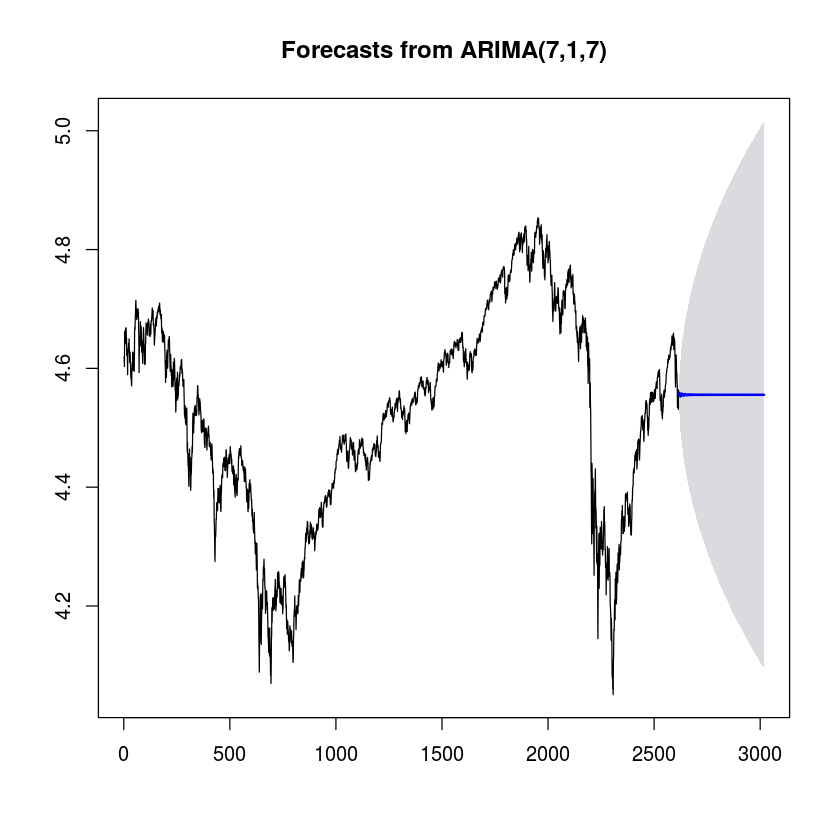

In [210]:
fit2 = Arima(spy$train_log, order=c(7,1,7))
fit2

fit2_forecast = forecast(fit2, h=test_len,level=c(0.95))
accuracy(fit2_forecast, spy$test_log)
plot(fit2_forecast)

Series: spy$train_log 
ARIMA(9,1,0)                    

Coefficients:
          ar1      ar2     ar3      ar4      ar5      ar6      ar7     ar8
      -0.0774  -0.0997  0.0171  -0.0099  -0.0224  -0.0094  -0.0219  0.0186
s.e.   0.0196   0.0196  0.0198   0.0198   0.0198   0.0198   0.0198  0.0197
          ar9
      -0.0156
s.e.   0.0197

sigma^2 estimated as 0.0001941:  log likelihood=7474.98
AIC=-14929.95   AICc=-14929.87   BIC=-14871.25

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-2.634836e-05,0.01390606,0.009415746,-0.001161558,0.2108719,0.998527,-7.647034e-05,NA
Test set,1.204878e-01,0.14329338,0.125388871,2.548758048,2.6572076,13.297318,9.822693e-01,10.6909


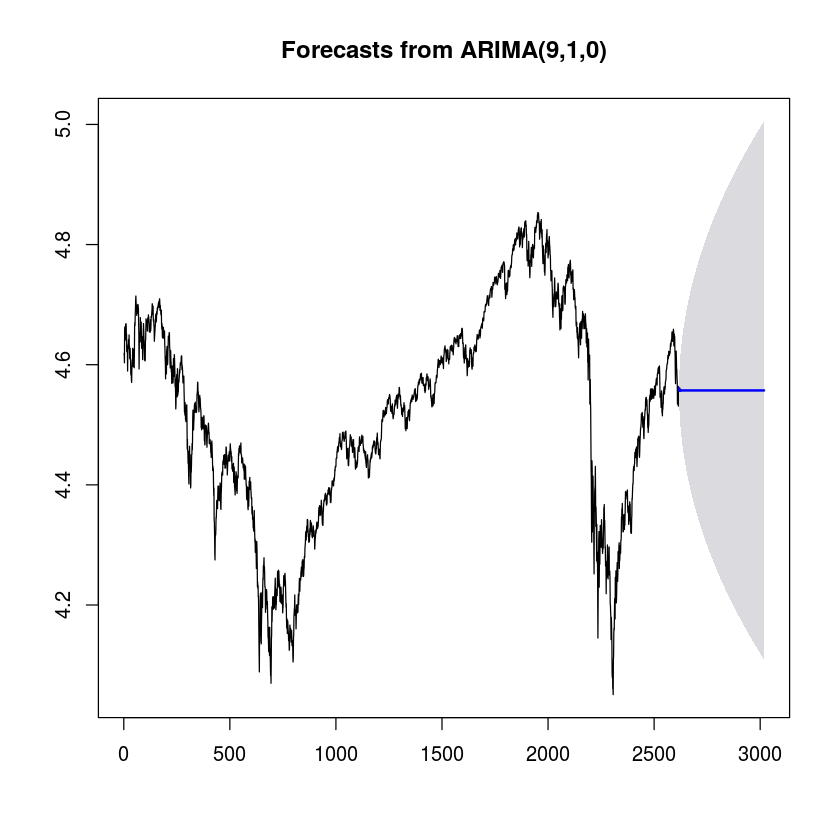

In [211]:
fit3 = Arima(spy$train_log, order=c(9,1,0))
fit3

fit3_forecast = forecast(fit3, h=test_len,level=c(0.95))
accuracy(fit3_forecast, spy$test_log)
plot(fit3_forecast)

Series: spy$train_log 
ARIMA(0,1,9)                    

Coefficients:
          ma1      ma2     ma3      ma4      ma5      ma6      ma7     ma8
      -0.0772  -0.0939  0.0342  -0.0058  -0.0264  -0.0028  -0.0113  0.0198
s.e.   0.0196   0.0196  0.0199   0.0200   0.0199   0.0190   0.0210  0.0187
          ma9
      -0.0192
s.e.   0.0212

sigma^2 estimated as 0.0001941:  log likelihood=7474.99
AIC=-14929.98   AICc=-14929.9   BIC=-14871.28

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-2.634836e-05,0.01390606,0.009415746,-0.001161558,0.2108719,0.998527,-7.647034e-05,NA
Test set,1.204878e-01,0.14329338,0.125388871,2.548758048,2.6572076,13.297318,9.822693e-01,10.6909


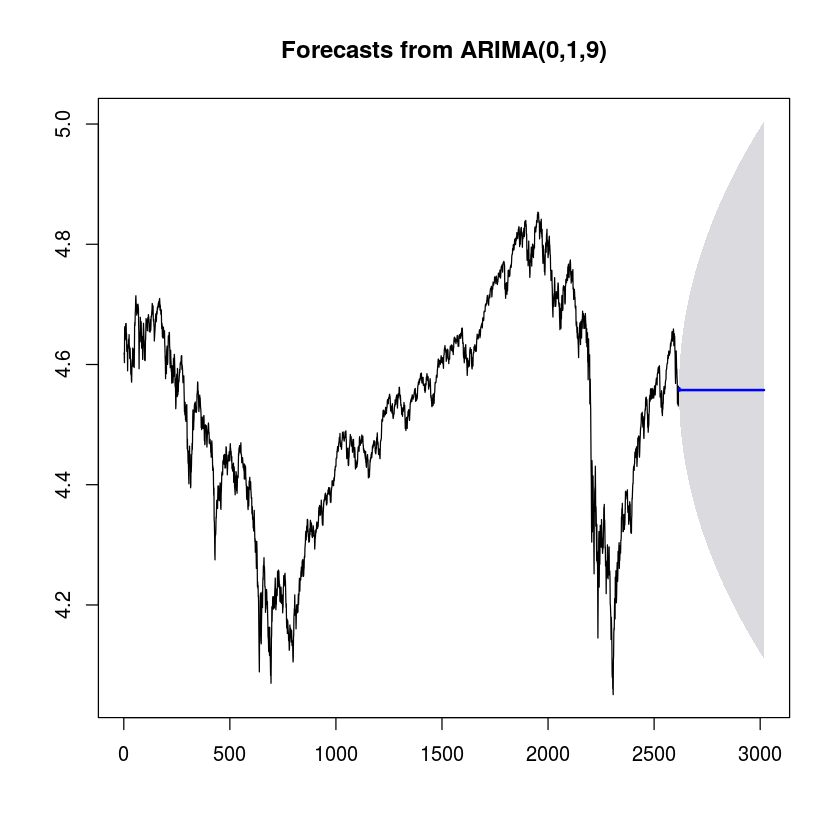

In [212]:
fit4 = Arima(spy$train_log, order=c(0,1,9))
fit4

fit4_forecast = forecast(fit4, h=test_len,level=c(0.95))
accuracy(fit3_forecast, spy$test_log)
plot(fit4_forecast)

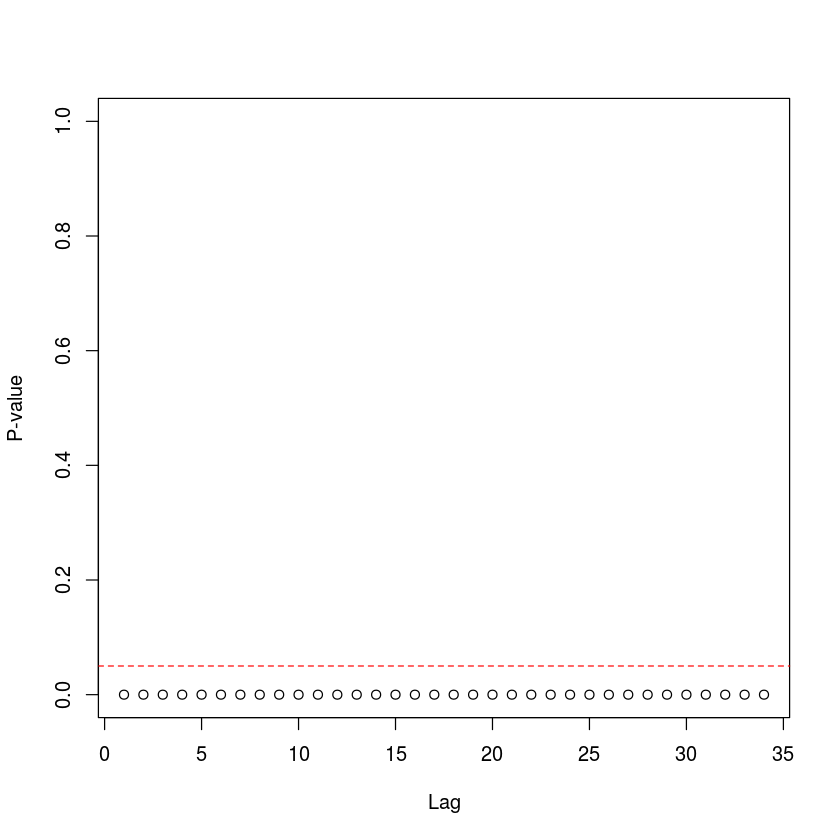

In [213]:
McLeod.Li.test(y = spy$train_diff) # test if ARCH is reasonable



In [214]:
shapiro.test(spy$train_diff) # test if the data's normality


	Shapiro-Wilk normality test

data:  spy$train_diff
W = 0.9109, p-value < 2.2e-16


In [215]:
#install.packages('fBasics')
library(fBasics)

skewness(spy$train_diff) # testing for skewness
kurtosis(spy$train_diff)

[1] 0.08643492
attr(,"method")
[1] "moment"

[1] 9.452542
attr(,"method")
[1] "excess"